### Use the California housing dataset and try adding features (like interaction terms between variables) to see if the model's performance improves.

In [20]:
# Load the Data = https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Descriptive Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.

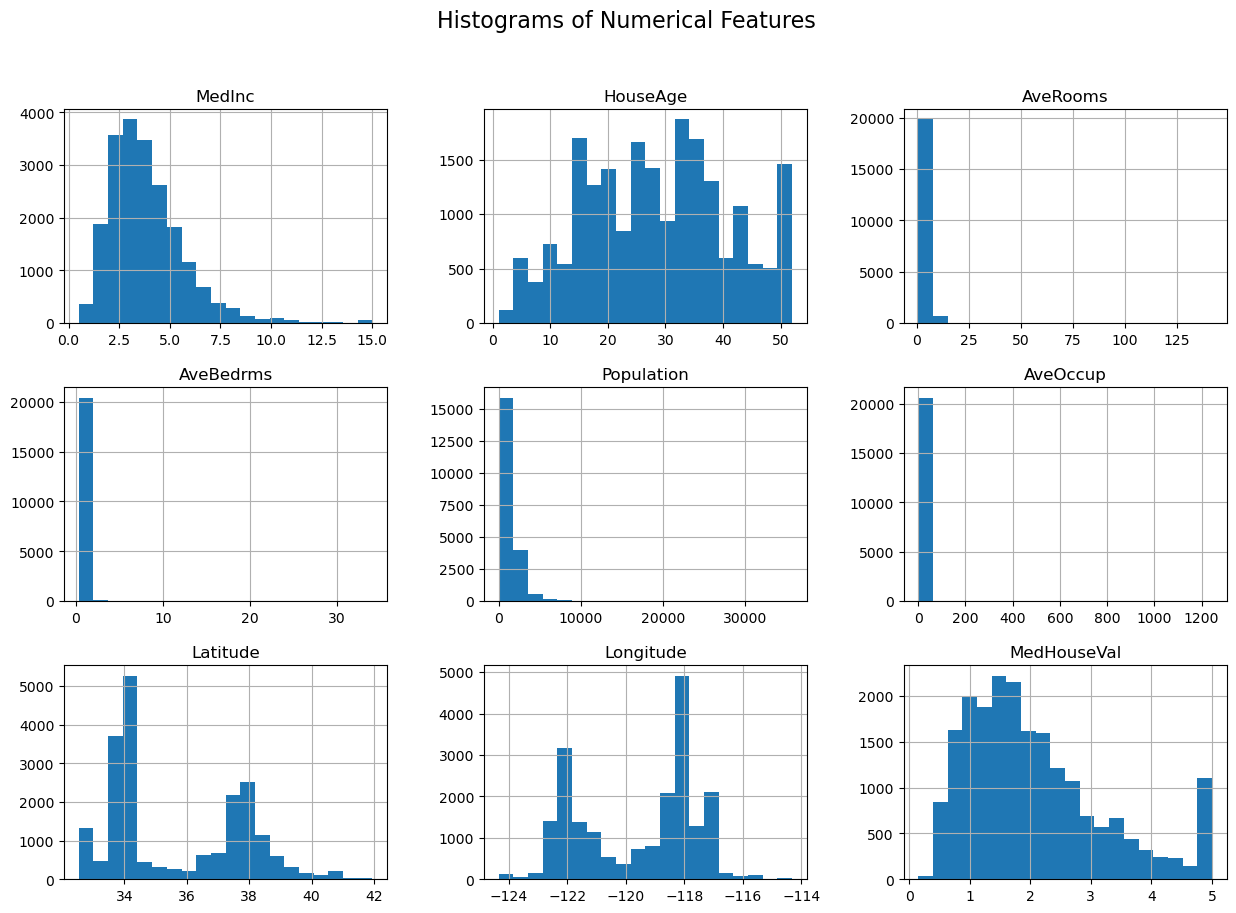

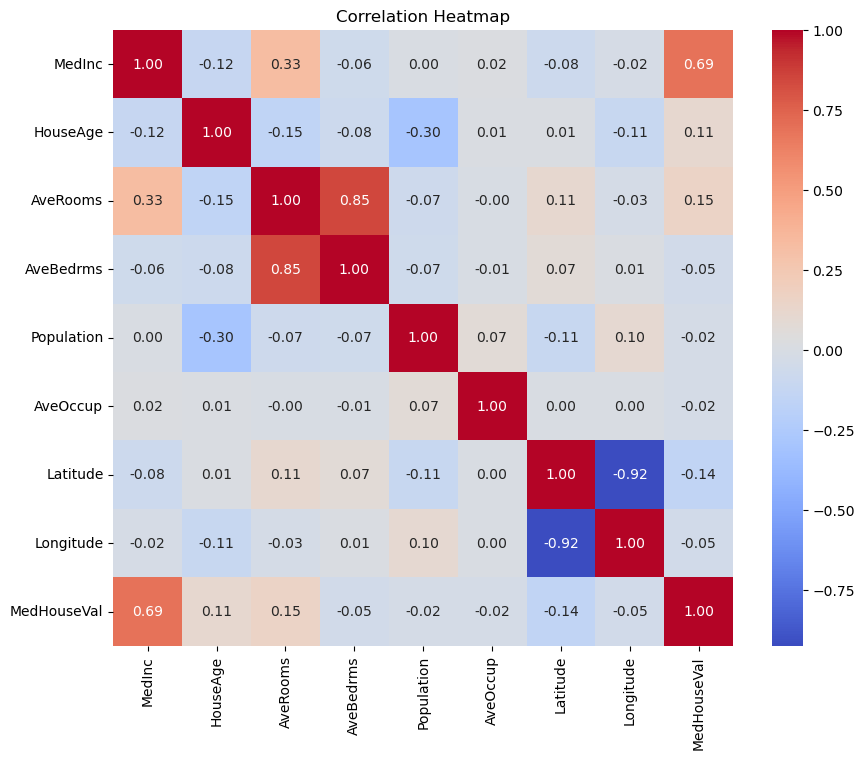

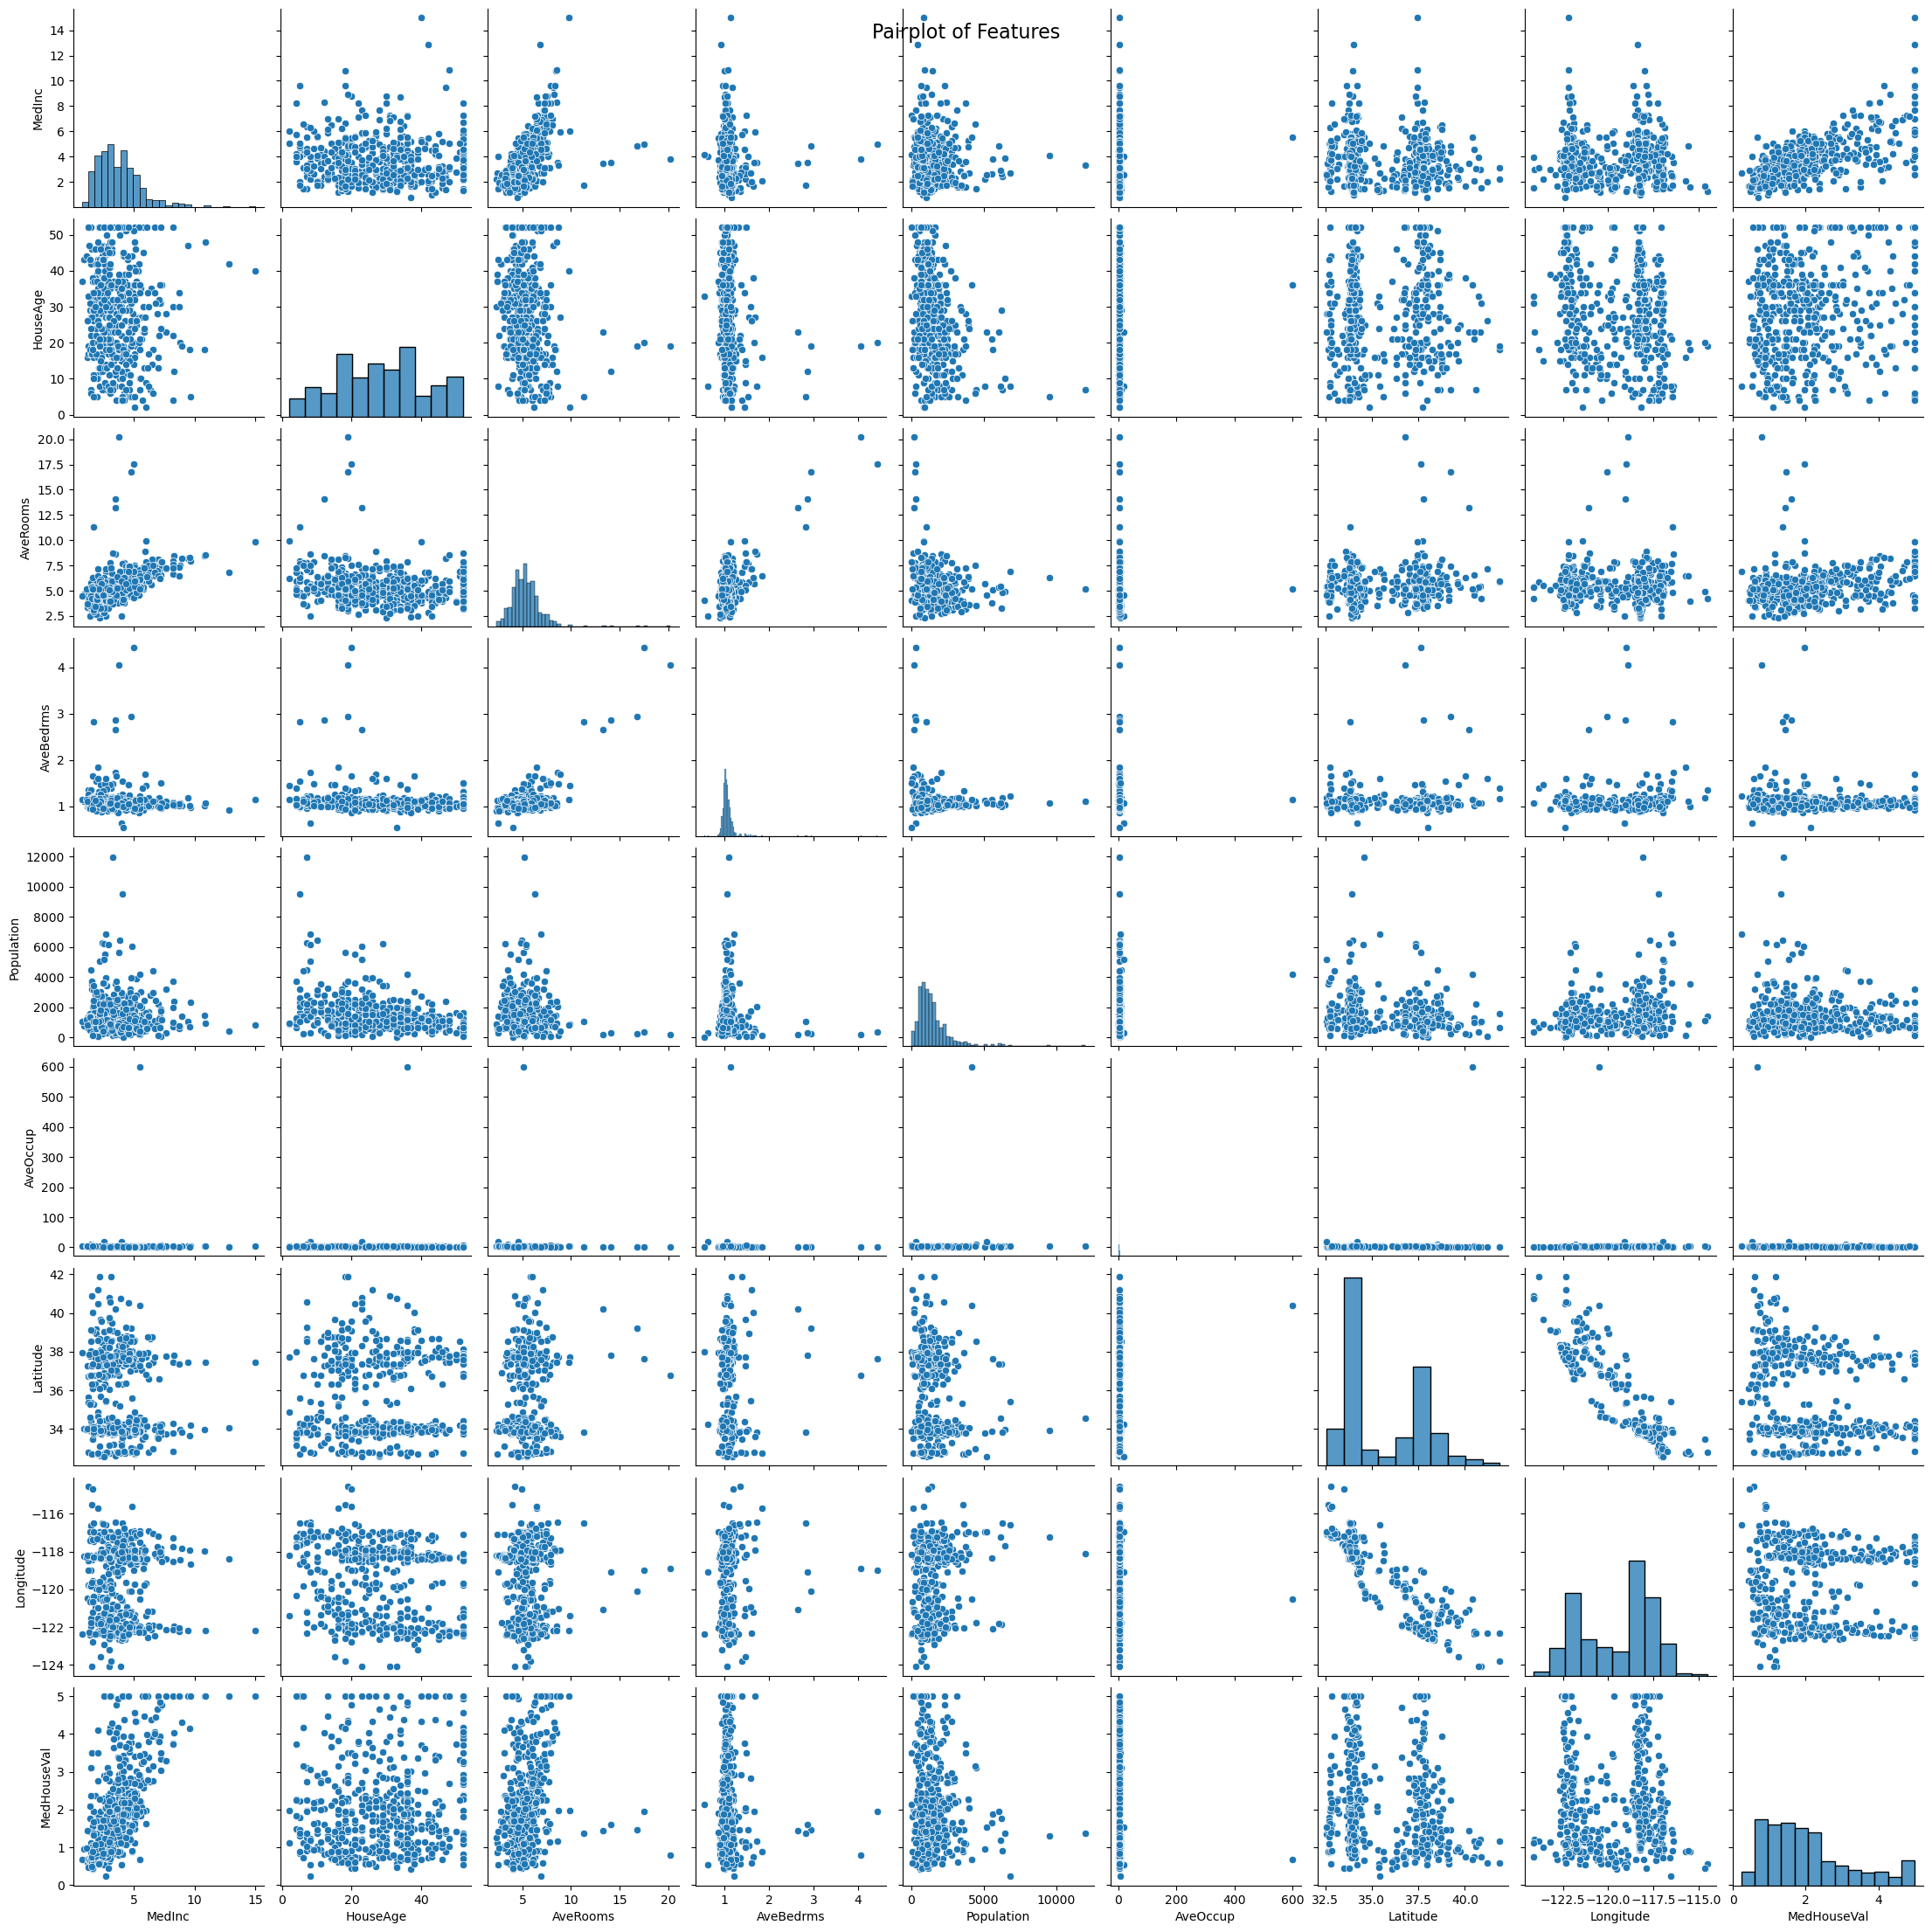

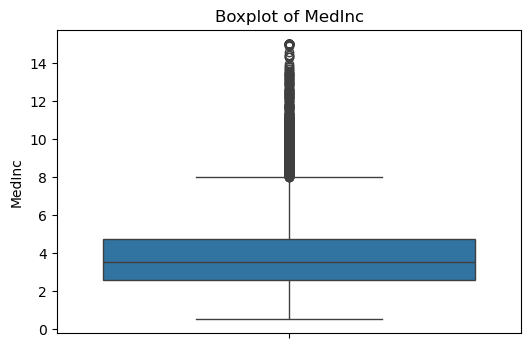

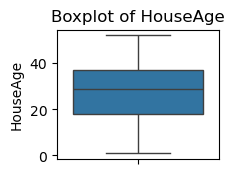

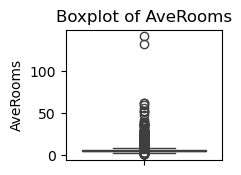

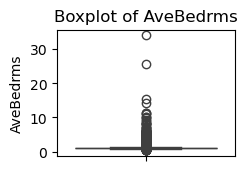

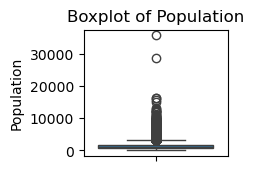

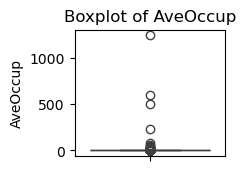

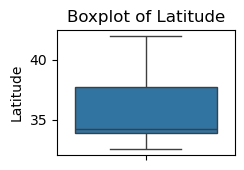

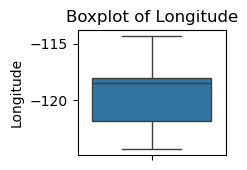

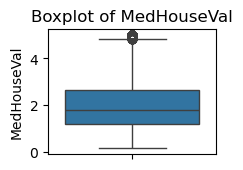

In [21]:
# Exploratory Data Analysis

print("\nDataFrame Info:")
print(df.info())

# Descriptive stats
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Histograms for numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (sample a subset for large datasets)
sns.pairplot(df.sample(n=500) if len(df) > 500 else df) # Sample if large
plt.suptitle("Pairplot of Features", fontsize=16)
plt.show()

# Boxplots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()

{'Without Interaction Terms': {'Mean Squared Error': 0.5558915986952444, 'R-squared': 0.5757877060324508}, 'With Interaction Terms': {'Mean Squared Error': 0.4946973440902672, 'R-squared': 0.6224862983201231}}


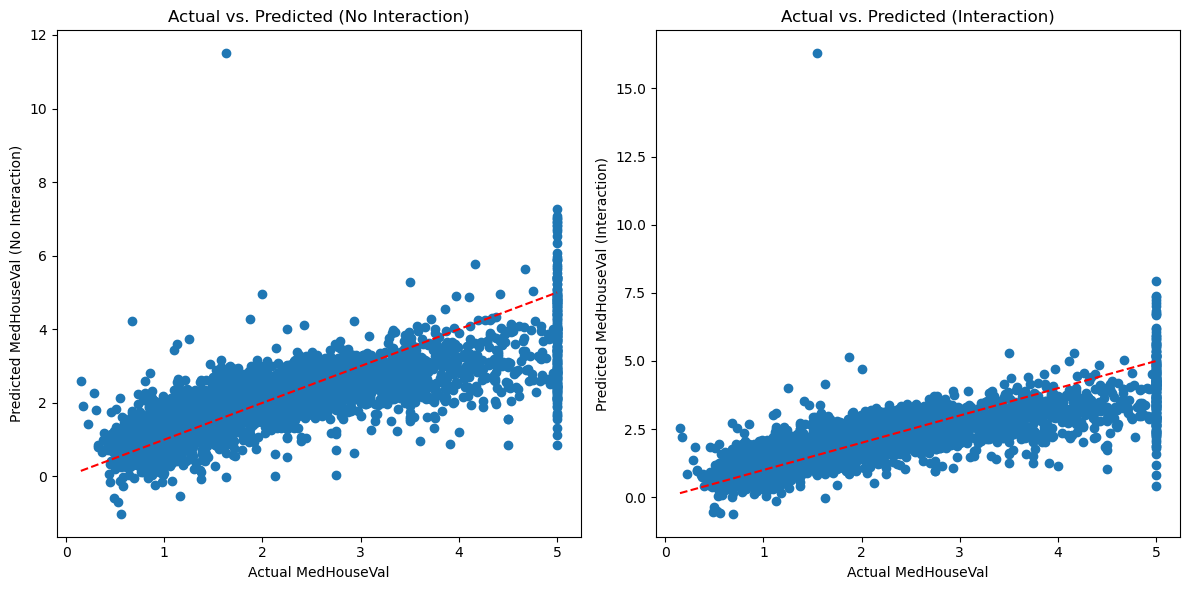

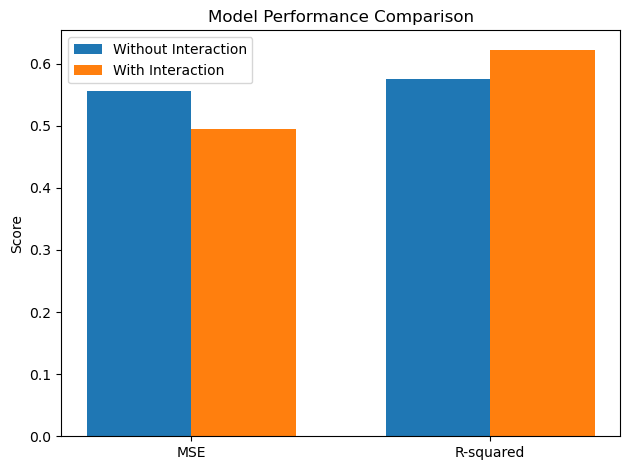

In [24]:
# Split the dataset into features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data into training and testing sets (without interaction terms)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model (without interaction terms)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_no_interaction = model.predict(X_test)

# Evaluate the model's performance without interaction terms
mse_no_interaction = mean_squared_error(y_test, y_pred_no_interaction)
r2_no_interaction = r2_score(y_test, y_pred_no_interaction)

# Add interaction terms between variables using PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data again into training and testing sets (with interaction terms)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a Linear Regression model (with interaction terms)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_with_interaction = model_poly.predict(X_test_poly)

# Evaluate the model's performance with interaction terms
mse_with_interaction = mean_squared_error(y_test_poly, y_pred_with_interaction)
r2_with_interaction = r2_score(y_test_poly, y_pred_with_interaction)

# Output the performance metrics for comparison
performance_comparison = {
    "Without Interaction Terms": {
        "Mean Squared Error": mse_no_interaction,
        "R-squared": r2_no_interaction
    },
    "With Interaction Terms": {
        "Mean Squared Error": mse_with_interaction,
        "R-squared": r2_with_interaction
    }
}

# Print the comparison
print(performance_comparison)

# Visualize the results
# Scatter plot of actual vs. predicted values (without interaction terms)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_no_interaction)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal (No Interaction)")
plt.title("Actual vs. Predicted (No Interaction)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

# Scatter plot of actual vs. predicted values (with interaction terms)
plt.subplot(1, 2, 2)
plt.scatter(y_test_poly, y_pred_with_interaction)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal (Interaction)")
plt.title("Actual vs. Predicted (Interaction)")
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'r--')  # Diagonal line

plt.tight_layout()
plt.show()

# Bar plot of MSE and R-squared for comparison
labels = ['MSE', 'R-squared']
no_interaction_metrics = [mse_no_interaction, r2_no_interaction]
with_interaction_metrics = [mse_with_interaction, r2_with_interaction]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, no_interaction_metrics, width, label='Without Interaction')
rects2 = ax.bar([i + width for i in x], with_interaction_metrics, width, label='With Interaction')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

### Experiment with a Ridge or Lasso regression model on the dataset, and compare the results with the regular Linear Regression model.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


Model Performance Comparison:

Linear Regression:
Mean Squared Error: 0.5559
R-squared: 0.5758

Ridge Regression:
Mean Squared Error: 0.5558
R-squared: 0.5759

Lasso Regression:
Mean Squared Error: 0.6135
R-squared: 0.5318


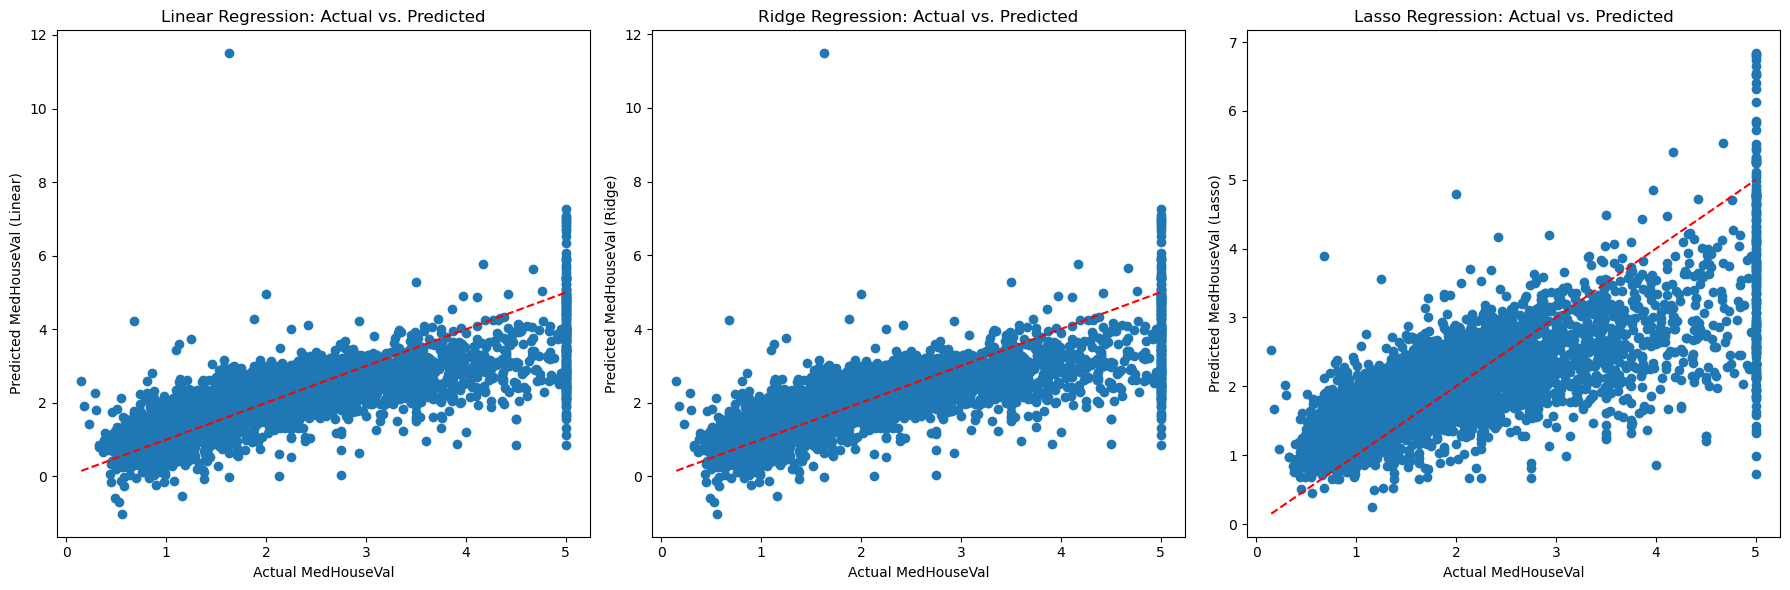

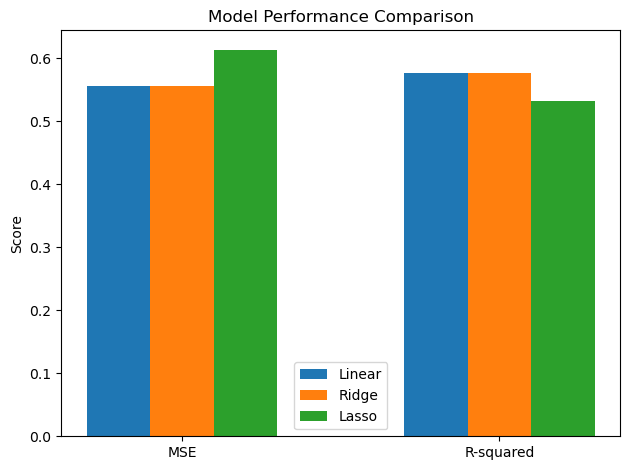

In [27]:
# Split the dataset into features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Train a Ridge Regression model (with regularization)
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for more/less regularization
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Train a Lasso Regression model (with regularization)
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for more/less regularization
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the models' performance
performance_comparison = {
    "Linear Regression": {
        "Mean Squared Error": mean_squared_error(y_test, y_pred_linear),
        "R-squared": r2_score(y_test, y_pred_linear)
    },
    "Ridge Regression": {
        "Mean Squared Error": mean_squared_error(y_test, y_pred_ridge),
        "R-squared": r2_score(y_test, y_pred_ridge)
    },
    "Lasso Regression": {
        "Mean Squared Error": mean_squared_error(y_test, y_pred_lasso),
        "R-squared": r2_score(y_test, y_pred_lasso)
    }
}

# Print the comparison of the models' performance
print("Model Performance Comparison:")
for model, metrics in performance_comparison.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Visualize the results
# Scatter plot of actual vs. predicted values for each model
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal (Linear)")
plt.title("Linear Regression: Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal (Ridge)")
plt.title("Ridge Regression: Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal (Lasso)")
plt.title("Lasso Regression: Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()

# Bar plot of MSE and R-squared for comparison
labels = ['MSE', 'R-squared']
linear_metrics = [performance_comparison["Linear Regression"]["Mean Squared Error"], performance_comparison["Linear Regression"]["R-squared"]]
ridge_metrics = [performance_comparison["Ridge Regression"]["Mean Squared Error"], performance_comparison["Ridge Regression"]["R-squared"]]
lasso_metrics = [performance_comparison["Lasso Regression"]["Mean Squared Error"], performance_comparison["Lasso Regression"]["R-squared"]]

x = range(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x, linear_metrics, width, label='Linear')
rects2 = ax.bar([i + width for i in x], ridge_metrics, width, label='Ridge')
rects3 = ax.bar([i + width * 2 for i in x], lasso_metrics, width, label='Lasso')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

### Find a dataset of your choice, split it, train a regression model, and evaluate the results.

Mean Squared Error: 24.2911
R-squared: 0.6688

Comparison of Actual vs Predicted Prices:
     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880


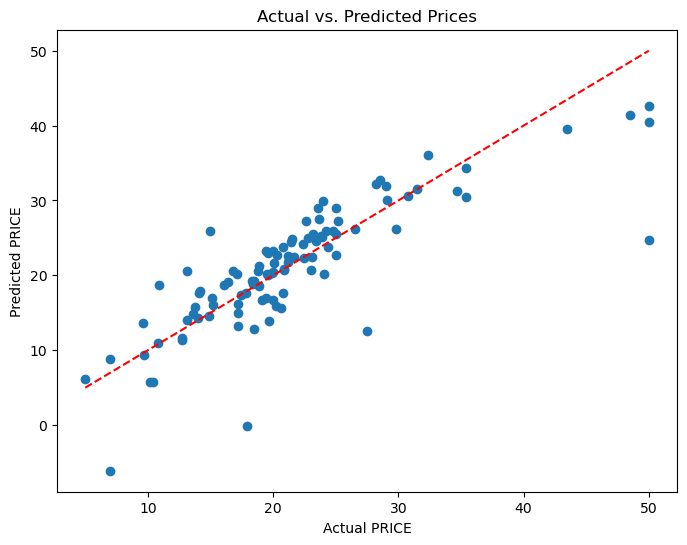

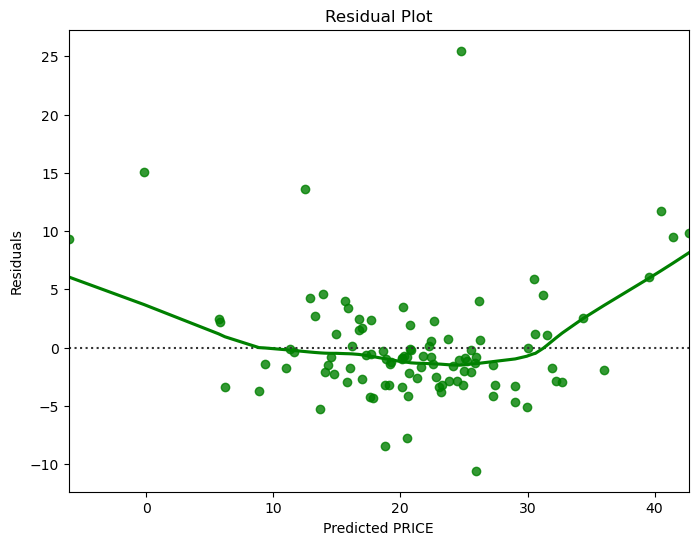

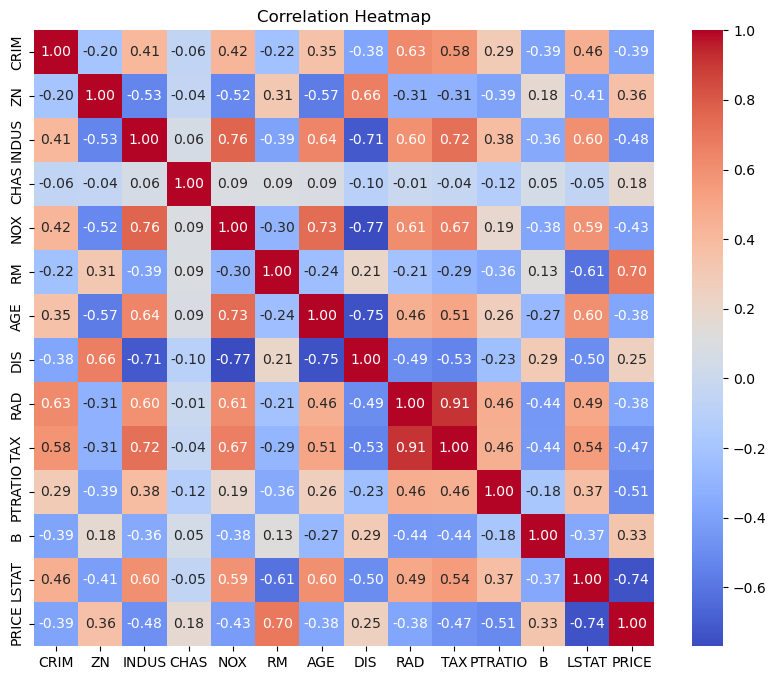

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load a dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)  # Corrected line
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=feature_names)
df['PRICE'] = target

# Split the dataset into features (X) and target (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Display the first few predicted vs actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted Prices:")
print(comparison_df.head())

# Visualize the results
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual PRICE")
plt.ylabel("Predicted PRICE")
plt.title("Actual vs. Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Corrected line
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel("Predicted PRICE")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()